In [17]:
nome = 'Flávio Cariel Ferreira'
login = 'flavio.f'
RA = 11202231018

# Ex. 1: Calculando $\pi$ a partir da definição

Neste exercício, vamos buscar calcular o valor de $\pi$ a partir da fórmula para a área do círculo:

$$ A= \pi r^2$$

Se tomarmos $r=1$, o círculo unitário, então a área é exatamente $\pi$. Além disso, podemos usar a simetria do círculo e calcularmos apenas a área do primeiro quadrante, que corresponde a $\frac{\pi}{4}$.

Escreva a equação que descreve a circunferência na forma $y = f(x)$ para o 1$^o$ quadrante (note que os sinais se alteram em outros quadrantes). Veja que essa expressão não envolve funções trigonométricas, nem o conhecimento prévio do valor de $\pi$. A integral dessa função, $\int_0^1 f(x) dx$, deve valer $\frac{\pi}{4}$

Calcule essa integral usando o método de Simpson composto, com $n$ sub-intervalos.

1. É possível estimar o erro absoluto máximo cometido no cálculo dessa integral? Explique.

2. Plote o erro absoluto da aproximação de $\pi$ obtida em função do número $n$ de sub-intervalos, variando $n$ entre 10 e 100. Use escala logarítmica nos dois eixos.


### Respostas / solução

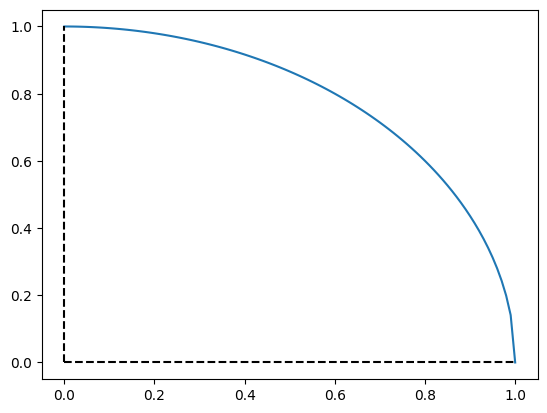

In [18]:
import matplotlib.pyplot as plt
import numpy as np

"""
Definindo a função que retorna a circunferência unitária e 
plotando para clareza gráfica
"""


def f(x):
    return (1 - x**2) ** 0.5


x = np.arange(0, 1 + 0.01, 0.01)

plt.plot(x, f(x))

plt.plot([0, 0], [0, 1], 'k--')

plt.plot([0, 1], [0, 0], 'k--')

In [19]:
"""
Definindo o método para cálculo da aproximação de uma
integral.
"""


def metodo_simpson_composto(f, a, b, n):

    """
    Recebe a função F que queremos integrar, o começo e o fim do intervalo
    de integração, e a quantidade de vezes a se iterar o método de simpson.
    """

    xi = np.linspace(a, b, 2 * n + 1)
    yi = f(xi)
    h = (b - a) / n
    Isimp = (
        h
        / 6
        * (
            f(xi[0])
            + f(xi[-1])
            + 2 * np.sum(f(xi[1::2]))
            + 4 * np.sum(f(xi[::2]))
        )
    )
    return Isimp

<h1>Questão 1</h1>


O erro pode ser estimado analiticamente desta forma:

$$ E_{abs} = |I_\text{exata} - I_\text{Simpson}| = \frac{h^5 f^{(4)}(\xi)}{90} \leq \frac{h^5}{90} M$$

Numericamente, não é fácil saber a quarta derivada da função que estamos buscando integrar, portanto, não há modo de generalizar para todas funções. Entretanto, como sabemos o resultado desta integral, podemos estimar o erro calculando o módulo da diferença entre a aproximação e a integral exata, como demonstrado a seguir:

In [20]:
n = 100000000

erro_cometido = abs(metodo_simpson_composto(f, 0, 1, n) - np.pi / 4)

print(
    f'O erro cometido ao estimar a função com {n} iterações é de: \n{erro_cometido}'
)

O erro cometido ao estimar a função com 100000000 iterações é de: 
4.999832547980532e-09


<h1>Questão 2</h1>

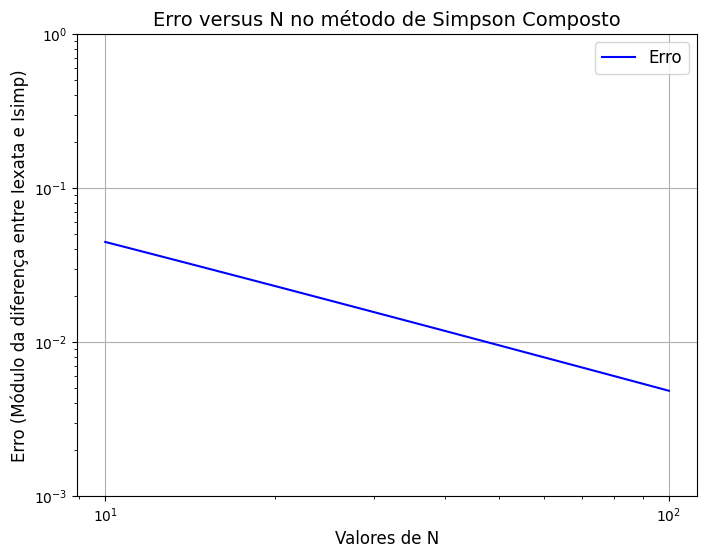

In [21]:
valores_de_n = np.arange(10, 101)


resultados = [
    abs(metodo_simpson_composto(f, 0, 1, n) - np.pi / 4) for n in valores_de_n
]

plt.figure(figsize=(8, 6))
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.plot(valores_de_n, resultados, color='b', linestyle='-')

plt.xlabel('Valores de N', fontsize=12)
plt.ylabel('Erro (Módulo da diferença entre Iexata e Isimp)', fontsize=12)
plt.title('Erro versus N no método de Simpson Composto', fontsize=14)
plt.legend(['Erro'], fontsize=12)

plt.ylim(1e-3, 1)

plt.show()

## (opcional) Questão bônus (só pela diversão!) - método de Monte Carlo

O nome diz tudo: é um bônus, você não precisa fazer se isso não te trouxer nenhuma diversão ou satisfação intelectual.

Uma outra forma de calcular a área do círculo é sorteando muitos pontos dentro do retângulo $[0;1] \times [0; 1]$. Para cada ponto sorteado, você checa se ele cai dentro ou fora do círculo, pela distância dele até a origem (o ponto $(0,0)$). Se você sorteia um valor de $x$ e um de $y$ de uma distribuição uniforme em $[0; 1]$, a chance de cair dentro do círculo deve ser exatamente a área do quadrante do círculo dividido pela área do quadrado, ou seja, $\frac{\pi}{4}$. Para estimar essa probabilidade, usamos a lei dos grandes números: sorteamos muitas vezes, e contamos a fração de vezes que nosso sorteio cai dentro do círculo - para um número muito grande de sorteios, a frequência se aproxima da probabilidade procurada.

Em Python, o `numpy` tem uma função para sortear números aleatórios, a `np.random.rand()`:

In [22]:
import numpy as np
from matplotlib import pyplot as pt

# sorteia um número aleatório - rode várias vezes e confira!
print(np.random.rand())

# também pode ser conveniente sortear muitos números de uma vez
print(np.random.rand(20))

# só checando se parecem realmente ser uniformemente distribuídos...
x = np.random.rand(1000000)
pt.hist(x, edgecolor='black')   # deve ser "quase horizontal"

0.18477340802719344
[0.76387752 0.92244368 0.43476281 0.07074314 0.92128471 0.44237616
 0.04417899 0.84467828 0.31496708 0.03943655 0.60945841 0.14001974
 0.7030248  0.32138091 0.39762067 0.94541221 0.5671095  0.53373696
 0.72360747 0.26109604]


(array([ 99882.,  99746., 100015.,  99992., 100200., 100087., 100366.,
        100068.,  99570., 100074.]),
 array([9.83348122e-07, 1.00000834e-01, 2.00000685e-01, 3.00000536e-01,
        4.00000387e-01, 5.00000238e-01, 6.00000089e-01, 6.99999940e-01,
        7.99999791e-01, 8.99999642e-01, 9.99999493e-01]),
 <BarContainer object of 10 artists>)


Implemente o método de Monte Carlo descrito acima e verifique quantos pontos são necessários para obter precisão similar à do método direto feito antes!

### Mas...

Esse método é estúpido! Dá muito mais trabalho, não!?

De certa forma, sim, mas as coisas não são tão simples. Imagine que você quisesse não uma área, mas um volume. Nesse caso, teríamos uma integral dupla, que exige que adaptemos os métodos anteriores, tomando um grid em 2 dimensões. Este método, porém, permanece exatamente o mesmo. De fato, isso é verdade para integrais em qualquer dimensão (hipervolumes). Daí o fato de esse tipo de técnica ser usada em integrais de dimensão muito alta - pense em integrais triplas, quádruplas etc. e continue, integrais em 10 dimensões, 20 dimensões e por aí afora. Na prática, o método de Monte Carlo pode ser otimizado amostrando os pontos de uma forma bem mais esperta, de maneira a exigir bem menos pontos do que uma amostra totalmente aleatória.

In [23]:
## solução *opcional*

import numpy as np
import pandas as pd

In [24]:
#Criando um Dataframe com os números sorteados.

numero_de_sorteios = 100000
df = pd.DataFrame(np.random.rand(numero_de_sorteios, 2), columns=['X', 'Y'])

In [25]:
# Fazendo o cálculo da distância da origem. Contando quantos
# pontos cairam dentro da circunferência. Calculando a probabi-
# lidade (área) e o erro cometido da aproximação.

df['Distancia'] = (df['X'] ** 2 + df['Y'] ** 2) ** 0.5
df_distancia_maior_q_1 = df.query('Distancia <= 1')
numero_de_pontos_dentro_circunferencia = len(df_distancia_maior_q_1)
probabilidade = numero_de_pontos_dentro_circunferencia / numero_de_sorteios
erro_cometido_mtc = abs(probabilidade - (np.pi / 4))

In [26]:
# Printando resultados e fazendo um comparativo com o 
# método de simpson composto.

print(f'Área exata: {np.pi/4}\n')

print(f'Área aproximada por método de Monte Carlo: {probabilidade}\n')

print(
    f'Ao utilizar o MTC com {numero_de_sorteios} números sorteados, é obtido um erro de:\n{erro_cometido_mtc}\n'
)
print(
    f'Ao utilizar o Método de Simpson composto com {n} iterações, é obtido um erro de:\n{erro_cometido}\n'
)
print(
    f'Módulo da diferença entre os dois métodos: {abs(erro_cometido_mtc - erro_cometido)}'
)

Área exata: 0.7853981633974483

Área aproximada por método de Monte Carlo: 0.78533

Ao utilizar o MTC com 100000 números sorteados, é obtido um erro de:
6.816339744830646e-05

Ao utilizar o Método de Simpson composto com 100000000 iterações, é obtido um erro de:
4.999832547980532e-09

Módulo da diferença entre os dois métodos: 6.815839761575848e-05


In [27]:
iteracoes_ou_sorteios = 10000

In [28]:
# Criando uma lista com o erro conforme o número de 
# números sorteados varia.

varios_sorteios = np.arange(1, iteracoes_ou_sorteios)
lista_erro_mtc = []

for numero_de_sorteios in varios_sorteios:
    df = pd.DataFrame()
    df = pd.DataFrame(
        np.random.rand(numero_de_sorteios, 2), columns=['X', 'Y']
    )
    df['Distancia'] = (df['X'] ** 2 + df['Y'] ** 2) ** 0.5
    df_distancia_maior_q_1 = df.query('Distancia <= 1')
    numero_de_pontos_dentro_circunferencia = len(df_distancia_maior_q_1)
    probabilidade = numero_de_pontos_dentro_circunferencia / numero_de_sorteios
    erro_cometido_mtc = abs(probabilidade - (np.pi / 4))
    lista_erro_mtc.append(erro_cometido_mtc)

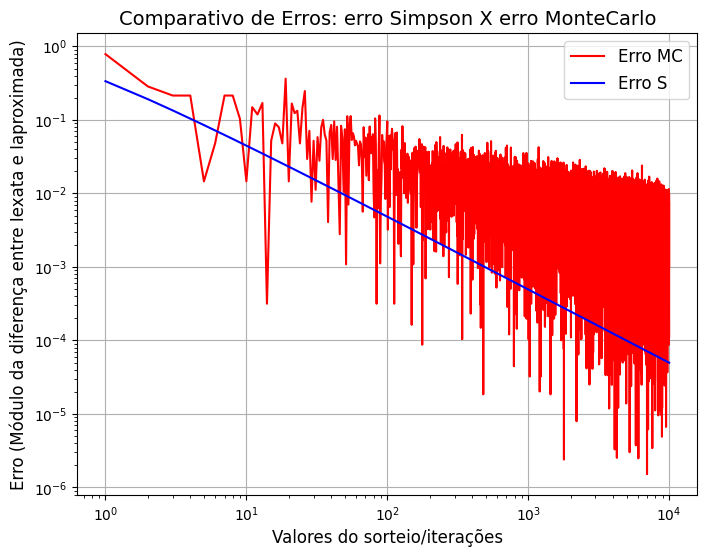

In [29]:
# Replicando o código do plot do erro de simpson, e adicionando
# a lista com os erros calculada na célula anterior

valores_de_n = np.arange(1, iteracoes_ou_sorteios)


resultados = [
    abs(metodo_simpson_composto(f, 0, 1, n) - np.pi / 4) for n in valores_de_n
]

plt.figure(figsize=(8, 6))
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.plot(varios_sorteios, lista_erro_mtc, color='r', linestyle='-')
plt.plot(valores_de_n, resultados, color='b', linestyle='-')

plt.xlabel('Valores do sorteio/iterações', fontsize=12)
plt.ylabel('Erro (Módulo da diferença entre Iexata e Iaproximada)', fontsize=12)
plt.title('Comparativo de Erros: erro Simpson X erro MonteCarlo', fontsize=14)
plt.legend(['Erro MC', 'Erro S'], fontsize=12)


plt.show()

# Ex. 2: Espectrometria e sistemas lineares

Uma técnica analítica comum é buscar identificar a composição de uma mistura por meio da chamada espectrometria de massa. Isso encontra aplicações em muitas áreas, como a análise de alimentos, detecção de poluição, bioquímica, física atômica, e muitas outras.

Um espectrômetro de massa funciona bombardeando (por exemplo) um gás com elétrons, o que gera uma mistura de íons que podem ser analisados com um galvanômetro (basicamente um campo elétrico que vai aplicar uma força proporcional à carga, mas gerar uma aceleração inversamente proporcional à massa) para determinar as razões massa/carga. Isto separa os íons de acordo com sua relação massa/carga, e o resultado pode ser visto num gráfico, chamado espectro, que tem uma amplitude em função da razão massa/carga, com picos concentrados nos valores da razão massa/carga de íons gerados a partir das substâncias no gás. A expectativa é que, quanto maior a concentração de uma certa componente, maior será a amplitude do pico correspondente a essa componente. O problema é que cada substância tem uma *sensibilidade* diferente, ou seja, gera mais ou menos íons ao ser bombardeada, e uma mesma substância pode gerar diferentes íons, contribuindo assim para diferentes picos do espectro.

Vamos assumir que o gás tem $n$ componentes não reativas desconhecidas, e vamos tomar as amplitudes $h_i$ dos $n$ maiores picos do espectro. Cada substância $j$ contribui para a amplitude $h_i$ de acordo com sua proporção $p_j$ no gás e com a seu *coeficiente de sensibilidade* $s_{ij}$, que é o quão frequente é a geração de íons de razão massa/carga compatíveis com o pico $i$ pela substância $j$. Cada amplitude $h_i$ é simplesmente a soma das contribuições de todas as substâncias presentes, ou seja:

$$ h_i = p_1 s_{i1} + p_2 s_{i2} + \ldots + p_n s_{in} $$

Levando em conta que temos $n$ picos e $n$ proporções $p_i$ que queremos obter, e conhecemos os valores dos coeficies de sensibilidade $s_{ij}$ e medimos os valores de $h_i$, temos em mãos um sistema de equações lineares:

$$ S\ \vec{p} = \vec{h} $$

onde $S$ é a matriz de coeficientes de sensibilidade.

Na prática, antes de calcularmos as proporções quantitativas, precisamos fazer uma análise *qualitativa* do espectro para identificar *quais substâncias* vamos considerar para inclusão entre os coeficientes de sensibilidade. Isto requer um pouco de experiência, e também ajuda conhecer a natureza e origem da amostra analisada.

## Exercício

Num certo experimento de espectrometria de um gás, mediram-se pressões parciais (proporcionais a proporções) de 7 picos, de acordo com a tabela:

| pico (índice) | amplitude |
|-------|-----------|
| 1 | 17.1  |
| 2 | 65.1 |
| 3 | 186 |
| 4 | 82.7 |
| 5 | 84.2 |
| 6 | 63.7 |
| 7 | 119.7 |

Ainda, temos os coeficientes de sensibilidades dados pela matriz S abaixo, em que cada linha corresponde ao índice do pico na tabela acima, e as colunas correspondem, na ordem, aos gases: hidrogênio, metano, etileno, eteno, propileno, propano, *n*-pentano.

In [30]:
import numpy as np

h = np.array([17.1, 65.1, 186, 82.7, 84.2, 63.7, 119.7])

S = np.array(
    [
        [16.87, 0.1650, 0.2019, 0.3170, 0.2340, 0.1820, 0.11],
        [0, 27.7, 0.862, 0.062, 0.073, 0.131, 0.12],
        [0, 0, 22.35, 13.05, 4.42, 6.001, 3.043],
        [0, 0, 0, 11.28, 0, 1.11, 0.371],
        [0, 0, 0, 0, 9.85, 1.1684, 2.108],
        [0, 0, 0, 0, 0.299, 15.98, 2.107],
        [0, 0, 0, 0, 0, 0, 4.67],
    ]
)
print(S)

[[16.87    0.165   0.2019  0.317   0.234   0.182   0.11  ]
 [ 0.     27.7     0.862   0.062   0.073   0.131   0.12  ]
 [ 0.      0.     22.35   13.05    4.42    6.001   3.043 ]
 [ 0.      0.      0.     11.28    0.      1.11    0.371 ]
 [ 0.      0.      0.      0.      9.85    1.1684  2.108 ]
 [ 0.      0.      0.      0.      0.299  15.98    2.107 ]
 [ 0.      0.      0.      0.      0.      0.      4.67  ]]


Repare que algumas substâncias, como o hidrogênio, contribuem para o sinal em todos os picos, embora sejam mais pronunciadas no primeiro. Já o *n*-pentano só contribui para o último pico.

Com essas informações, calcule as proporções (ou pressões parciais) de cada um dos gases que compõem essa mistura. Use o método numérico **que preferir**, mas deixe o código completo da resolução abaixo, e **justifique** por que sua escolha foi apropriada.

### Respostas / solução

<h2 style='text-align: center'>Justificativa para o método escolhido</h2>

Como não há perspectiva do sistema se repetir (cada medição gerará uma matriz de coeficientes única para uma outra matriz única de resultados), não é útil utilizar o método de fatoramento LU. Ainda, não há diferença substancial entre os valores da matriz, não sendo necessário o pivotamento parcial. Assim, precisamos apenas escalonar a matriz e resolver assim que obtivermos a matriz triangular. 

In [31]:
def escalona(A, b, verbose=True):
    # .shape retorna as dimensões do vetor - é assim que sabemos seu tamanho
    # assert abaixo verifica se as dimensões de A são iguais e do mesmo
    # tamanho do vetor b, e dá erro se não forem
    assert A.shape[0] == A.shape[1] and A.shape[0] == b.shape[0]
    n = b.shape[0]
    # forma a matriz estendida
    E = np.c_[A, b]
    if verbose:
        print('E (0) =')
        print(E)
    for i in range(n):
        # E[i,i] é não-nulo? Se sim, seguimos em frente, se não, precisamos
        # pivotar antes de prosseguir
        if E[i, i] == 0:
            # Procurar uma linha abaixo da atual tal que E[k,i] != 0 e faça a troca
            for k in range(i + 1, n):
                if E[k, i] != 0:
                    # Trocar as linhas i e k
                    E[[i, k]] = E[[k, i]]
                    break

        for j in range(i + 1, n):
            # para cada linha j *abaixo* da linha atual (i), eliminamos o
            # elemento da coluna i (j,i) subtraindo da linha j um múltiplo da
            # linha i
            fator = E[j, i] / E[i, i]
            E[j, i:] -= fator * E[i, i:]

        if verbose:
            print(f'E ({i+1}) =')
            print(E)

    return E


def resolve_triangular(E, verbose=True):
    if verbose:
        print('E =')
        print(E)
    # número de linhas = tamanho da solução
    n = E.shape[0]
    x = np.zeros(n)
    # começamos pelo último elemento (índice n-1) e terminamos no 0
    for i in range(n - 1, -1, -1):
        # a soma é sobre todos os índices de i+1 até n-1
        x[i] = (E[i, n] - np.sum(E[i, i + 1 : n] * x[i + 1 : n])) / E[i, i]
        if verbose:
            print(f'x_{i+1} = {x[i]}')
    return x


resolve_triangular(escalona(S, h, verbose=False), verbose=False)

array([ 0.6525191 ,  2.20381849,  0.3347531 ,  6.43435572,  2.99747533,
        0.55054947, 25.63169165])

In [32]:
print(
    f'O vetor\n{resolve_triangular(escalona(S,h, verbose=False), verbose=False)}\ncorresponde ao vetor solução do sistema apresentado.'
)

O vetor
[ 0.6525191   2.20381849  0.3347531   6.43435572  2.99747533  0.55054947
 25.63169165]
corresponde ao vetor solução do sistema apresentado.
